<a href="https://colab.research.google.com/github/krakenkhan/GISMA_Teaching/blob/master/Data_Visualisation_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business and Data Visualisaiton context



*   This Project works with web scraped data of Video-Games sales along with Metacritic scores of the respective games.
*   Stakeholders of lare Vido game Companies, Indie-Games Publisher and Developer, Marketers and Business Analysts are the core Audience of this project.
*   The main Objective of this project is to provide our audience with actionable and feasable insights of the gaming industry so that they can make informed strategic decisions.

The Dataset includes variables such as Titles, platforms, year of release, genres, sales across different regions, critic & user ratings, critic & user count as well as age rating.



# **Data Exploration**

**Initial Data Assessment**





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import numpy as np
import matplotlib.ticker as ticker

# Download latest version
path = kagglehub.dataset_download("rush4ratio/video-game-sales-with-ratings")
path = path+"/Video_Games_Sales_as_at_22_Dec_2016.csv"
print("Path to dataset files:", path)

df = pd.read_csv(path)
df.head()        # Create a figure containing a single Axes.

100%|██████████| 476k/476k [00:00<00:00, 40.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/rush4ratio/video-game-sales-with-ratings/versions/2/Video_Games_Sales_as_at_22_Dec_2016.csv


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


**Statistical Summary**

In [ ]:
# gaining initial Insights of the data
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,10665.000000


**Data Quality Issues and Curation**

In [ ]:
# Checking for null values
print(df.isna().any())

# Cheking Data types
df.dtypes

Name                True
Platform           False
Year_of_Release     True
Genre               True
Publisher           True
NA_Sales           False
EU_Sales           False
JP_Sales           False
Other_Sales        False
Global_Sales       False
Critic_Score        True
Critic_Count        True
User_Score          True
User_Count          True
Developer           True
Rating              True
dtype: bool


,0
Name,object
Platform,object
Year_of_Release,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64
Global_Sales,float64


**Data Curation needed**
Some of the Columns consists of null values which needs to be taken care of.\
Games with null names will be left as is as singular titles are not of much importance to our data analyses.
Games with missing name, Genre, Publisher as well as Developer will be removed from the dataset.
Games with unknown year of Release will be given a year of Release that is the mode of all the games of that genre.
Games with missing genres will be given an 'Unknown' genre.
Games of missing Publisher but a given Developer will be given the name of the Developer as their Publisher which is common in gaming industry. Often game Developers that have no Publishers are self-publishing the game.
Critic's and User's Scores and Counts if null will be given the median of the genre they belong too. So that the data is not skewed
Games with unknown age rating will be given an 'N/A' not applicable rating.
User-Score needs to be converted into a float data type instead of being an object.


# **Data Preprocessing**

In [ ]:
### Dropping all the entries That Have no name or genre.
df.dropna(axis= 'index', how = 'all', subset=['Name','Genre'],inplace=True)



## Abbrevating column names
df.loc[df['Genre'] == 'Role-Playing', 'Genre'] = 'RPG'
df.loc[df['Genre'] == 'Simulation', 'Genre'] = 'Sim'
df.loc[df['Genre'] == 'Platform', 'Genre'] = 'Platformers'
### Assigning the Developer to the same name as it's Publisher if Developer not given ###

#Creating a mask for Null values in Developer
filt = df['Developer'].isna()

df.loc[filt,'Developer'] = df.loc[filt, 'Publisher']


# Adding Unknown for  Null Publishers and Developers
filt_gs= df['Publisher'].isna()
df.loc[filt_gs, 'Publisher'] = 'Unkown'

filt_gs= df['Developer'].isna()
df.loc[filt_gs, 'Developer'] = 'Unkown'
print("Unknown Publishers and Developers reported")


# Giving an Age Rating of N/A to games with no rating
temp_filt = df['Rating'].isna()
df.loc[temp_filt, 'Rating'] = "N/A"
print("Unrated games found")


# Typecasting User Score for further Calculations
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
df['User_Score'] = df['User_Score'].astype(np.float64)


# #Filling scores and Count using 'Genre' based Mean.
df[['Critic_Score', 'Critic_Count','User_Score','User_Count']] = df.groupby('Genre')[['Critic_Score', 'Critic_Count','User_Score','User_Count']].transform(lambda x: x.fillna(x.mean()))


# Since only 1.6% of the total year is null giving them the Value of the Mode is the non-disruptive approach.
df['Year_of_Release'].fillna(df['Year_of_Release'].mode()[0], inplace=True)


Unknown Publishers and Developers reported
Unrated games found


<ipython-input-5-86190b8c5333>:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(df['Year_of_Release'].mode()[0], inplace=True)


# Data Visualisation with explanations

**Sales Trends Over Time:**
This trend will help us figure out how the sales of video games have increased through the years.It will also show us which regions had the most sales. These insights can help our audience to understand where the real video game market reside, which countries should be targeted as the main consumers.

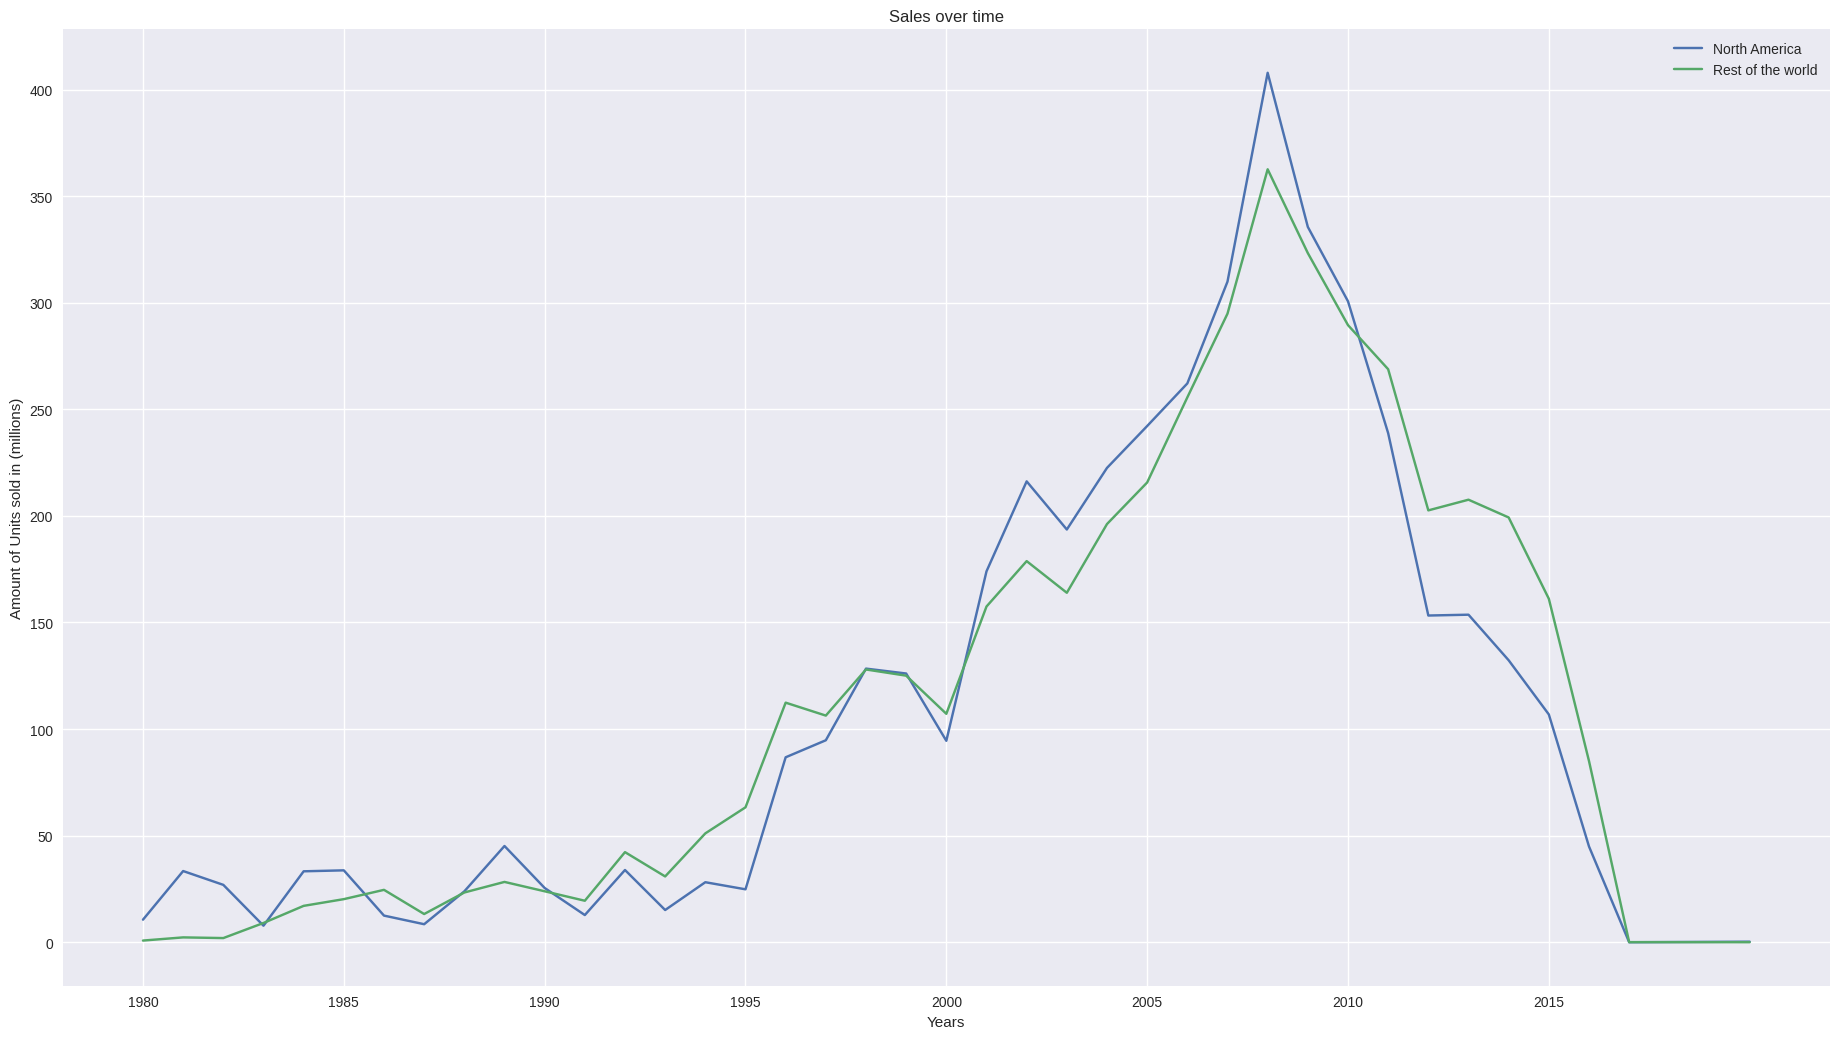

In [ ]:
#Adding Non-NA sales because other sales are too low individually
df['Rest_Sales'] = df.iloc[:,6:9].sum(axis=1)

# print(plt.style.available)
plt.style.use('seaborn-v0_8')
sales_trend = df.groupby(['Year_of_Release']).sum(numeric_only=True)
x_axis = sales_trend.index

fig1, ax = plt.subplots()

#Adding line graphs
ax.plot(x_axis, sales_trend[['NA_Sales']])
ax.plot(x_axis, sales_trend[['Rest_Sales']])
ax.legend(['North America','Rest of the world'])
ax.set_xticks(np.arange(1980, 2020, step=5), labels=np.arange(1980, 2020, step=5))
ax.set(ylabel = ('Amount of Units sold in (millions)') , xlabel= ("Years"), title=("Sales over time"))

#Formating the graph
plt.tight_layout()
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 10.5)
plt.tight_layout()
# plt.show()


In this code I have grouped the dataset on the basis of Year of release and summed up all the sales of every year. I then made a new column in the dataset with the name "Rest Sales" which comprises of every other region except NA. This decision was made because no other region was comparable with NA on its own.I used seaborn as my style and plotted line graphs for its simplicity and easy to understand nature.

---



**The Market**
This analysis shows how Video game sales has risen over time. The primary reason of a huge increase near the 2008 era might be the missing year of release in the original data, due to which the null Year of releases were given the mode which is 2008. Although a complete dataset would not have such a high rising graph. a lot of game released during the 2005-2010 time period. Although the west was going through an economic crisis, Video Game industry was rising more than ever, due to affordable entertainment and relatively low cost of production.

This graph also shows how North America has consistently been the main hug of the video game industry. While the rest of the world alltogether is on average higher than that of NA, NA itself is bigger consumer than any other region on this planet. Hence, as a Developer and Publisher, it is much easier for a game to find success that has been catered to the American and Canadian audience. NA sets the market standards and is the safest bet for anyone looking to enter the gaming market. As an investor it makes much more sense to study the American gaming market than anywhere else in the world.



---


**Analysis of Genre Popularity**

The analysis will lend an understanding of which genres are most popular among gamers. Furthermore, it will also depict which regions are more interested in which genres. This will help our audience to know what kind of games are best for what regions. This insight can make it easy for upcoming games to fight the right audience and cater to their specific needs.


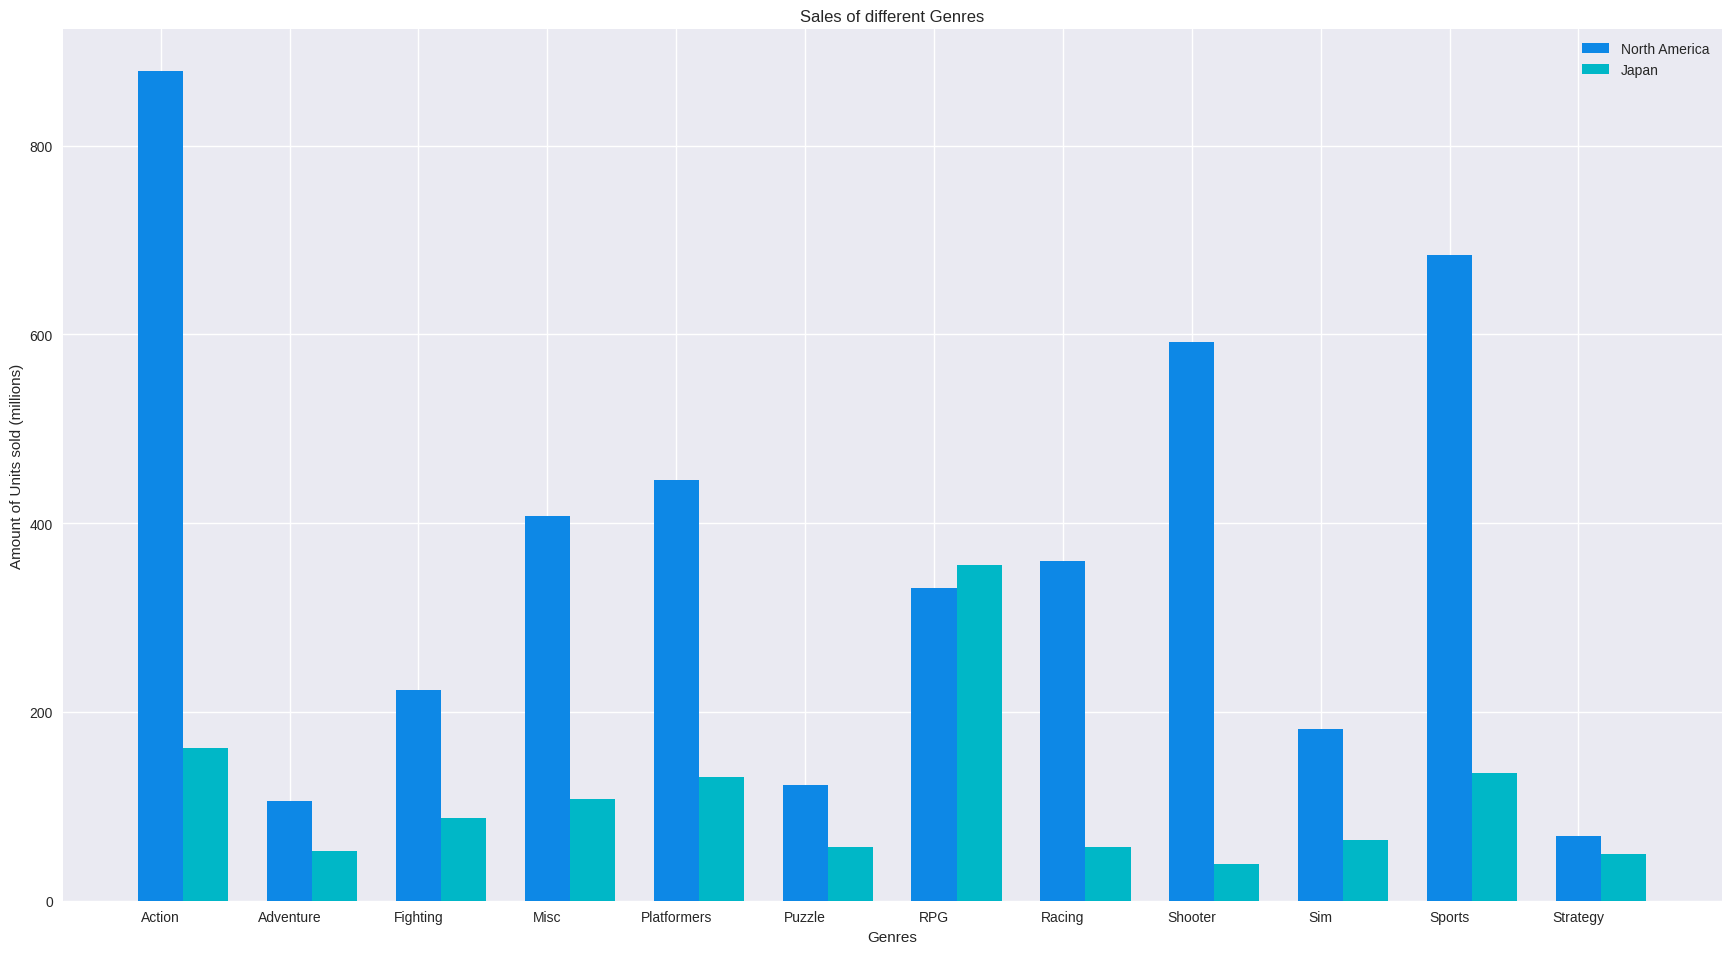

In [ ]:
#Sales Per Genre
plt.style.use('seaborn-v0_8')
sales_trend = df.groupby(['Genre']).sum(numeric_only=True)
x_axis =sales_trend.index
n=len(x_axis)
r = np.arange(n)
width=0.35
fig2, ax1 = plt.subplots()

#Creating Barplots
bar1  = ax1.bar(r, sales_trend['NA_Sales'],color='#0d88e6',label=x_axis,width=width)
bar2 = ax1.bar(r+width,sales_trend['JP_Sales'],color="#00b7c7",label=x_axis, width=width)
ax1.set_xticks(ticks=r,labels=x_axis)
ax1.set(ylabel = ('Amount of Units sold (millions)') , xlabel= ("Genres"), title=("Sales of different Genres") )

#Formatting the plot
ticker.LinearLocator
ticker.StrMethodFormatter(x_axis)
plt.tight_layout()
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 10.5)
ax1.legend([bar1,bar2],['North America','Japan'])
plt.show()


In this code I grouped the dataset on the basis of genre and added the sales of every genre. I then used bar plots to display sales of different regions together. Regions like EU and others were excluded because they followed the same pattern as NA

---


This graph shows how different Genres Perform in the west and the east. EU was not included in this graph because it follows identical trends as NA. It is surprising to see that Japanese market comprises of mostly RPGs, though Japan is the home of the biggest action and adventure producing game companies like Capcom and BandaiNamco. It seems the Western culture actively chooses to play games that involve Shooting , Action and Sports all of these three genres are
 for multiplayer games which are extremely popular in these countries. Japanese Consumers however seems to focus on long, almost book-like games that are RPGs. These are more relaxed as well as a laid back experience. This insight provides interesting contrast between the entertainment decisions of 2 very distinct cultures.


---



**Comparing Platforms**

By the comparison of different last generation consoles we will be able to find out which platforms are best suitable for new releases and performed well in which region. The audience can notice the trend of popularity  different platforms among different region which would be extremely helpful in deciding which platform should be chosen for future releases in which region.

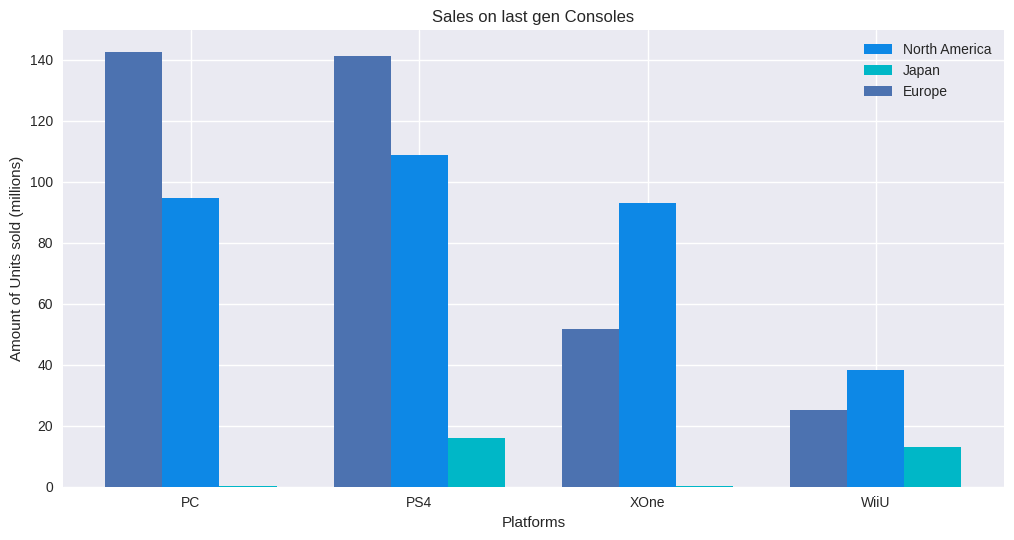

In [ ]:
#Sales Per Platform
plt.style.use('seaborn-v0_8')

#showing only the last gen consoles
sales_trend = df.groupby(['Platform']).sum(numeric_only=True)
nexgen = sales_trend.loc[['PC','PS4','XOne','WiiU'],['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
# print(nexgen)

x_axis =nexgen.index
n=len(x_axis)
r = np.arange(n)
width=0.25
fig3, ax1 = plt.subplots()

#Creating Barplots
bar1 = ax1.bar(r, nexgen['NA_Sales'],color='#0d88e6',label=x_axis,width=width)
bar2 = ax1.bar(r + width, nexgen['JP_Sales'],color="#00b7c7",label=x_axis, width=width)
bar3 = ax1.bar(r - width, nexgen['EU_Sales'],label=x_axis, width=width)
ax1.set_xticks(ticks=r,labels=x_axis)
ax1.set(ylabel = ('Amount of Units sold (millions)') , xlabel= ("Platforms"), title=("Sales on last gen Consoles") )

#Formatting the plot
ticker.LinearLocator
ticker.StrMethodFormatter(x_axis)
plt.tight_layout()
fig2 = plt.gcf()
fig2.set_size_inches(10.5, 5.5)
ax1.legend([bar1,bar2,bar3],['Europe','North America','Japan',])
plt.show()

In this code I grouped the dataset by platforms and then added the sales of these platforms together. I then decluttered the result by only choosing the last generation consoles with the .loc of the pandas library.
I then plotted the graph using bar graphs with matplotlib and used the object ticker of matplotlib to format my bars correctly and in a beautiful as well as readable manner.

---


**Console Decisions**

It is very important to consider the platforms a game will release in. As we can see japan as negligible PC players whereas EU and NA has a good mix of PC and Sony's playstation.However, such relatively low sales of the Nintendo's Console WiiU can be acredited to it's unpopularity in the gaming market. Although Nintendo is one of the biggest names in the gaming Industry, the WiiU has always recieved severe backlash from the gaming community as being a "failed console", because of it's old gen hardware are unattractive design. The dataset provides little information about the current gen consoles such as Nintendo Switch, which is one of the most sold console of all time. It is very interesting  and insightful to see which platforms should be considered as a game publisher for the success of the game.


---



**Ratings and Sales Correlations**

This correlation will be helpful in understanding whether critic and user reviews of video games affect the sales of these videogames. Our Audience can benefit by knowing which rating performs better than others

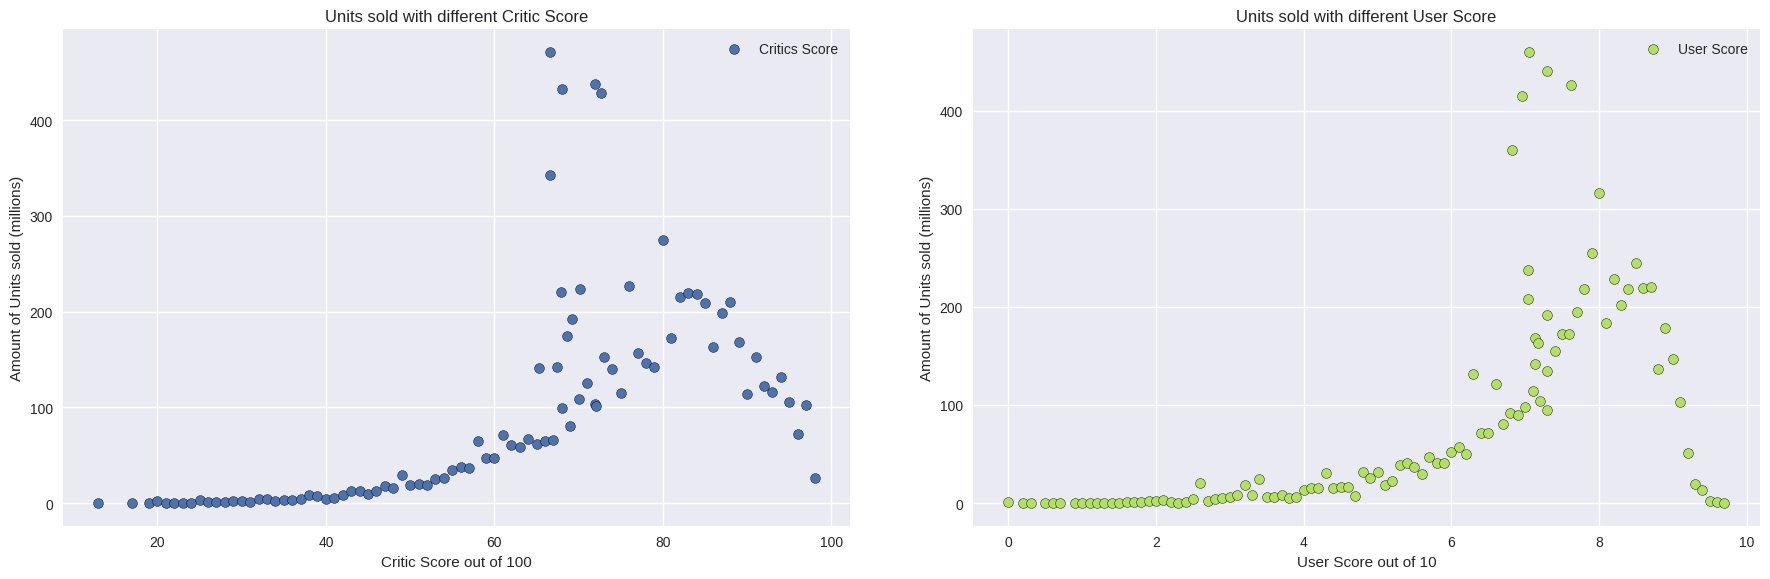

In [ ]:
plt.style.use('seaborn-v0_8')
crit_sales_trend = df.groupby(['Critic_Score']).sum(numeric_only=True)
user_sales_trend = df.groupby(['User_Score']).sum(numeric_only=True)

fig3, (ax3,ax4) = plt.subplots(nrows=1, ncols=2)

ax3.scatter(crit_sales_trend.index,crit_sales_trend['Global_Sales'],s=50, edgecolor='black')
ax4.scatter(user_sales_trend.index,user_sales_trend['Global_Sales'],s=50, edgecolors='black',color='#b2e061')
ticker.LinearLocator
ticker.StrMethodFormatter(x_axis)
plt.tight_layout()
ax3.set(ylabel = ('Amount of Units sold (millions)') , xlabel= ("Critic Score out of 100"), title=("Units sold with different Critic Score") )
ax4.set(ylabel = ('Amount of Units sold (millions)') , xlabel= ("User Score out of 10"), title=("Units sold with different User Score") )
fig2 = plt.gcf()
fig2.set_size_inches(18.5, 5.5)
ax3.legend(['Critics Score'])
ax4.legend(['User Score'] )
plt.show()





In this code I used scatter plot to display the different sale pattern of games with different user and critic score. I grouped the data set twice, once with user score and once with critic score then used subplots to plot them in different plots so that it does not look cluttered.


---



**Surprising**


This plot shows that most sold game are actually not the ones with the best rating but the ones that are critically and publically claimed to be 'Average'. the high outliers are the result of the missing values in our dataset which was editied and filled with average Genre specific rating,thus resulting in such skewness.However, disregarding the null values also provides a similar graph. Morever, These Critic-Scores and User-Scores are averages that are posted on webisted like Metacritic.com, which are highly skewed to begin with. As for someone who is involved in the gaming industry, albeit as an Investor, Publisher, Developer etc. It is very important to learn from these 'Mediocre' games to understand what the market actually likes.


---



**Top Publishers**

This insigth will help us find out which publishers are the top performing assets in the gaming market. Audience will gain insights into the top competition in the video game industry

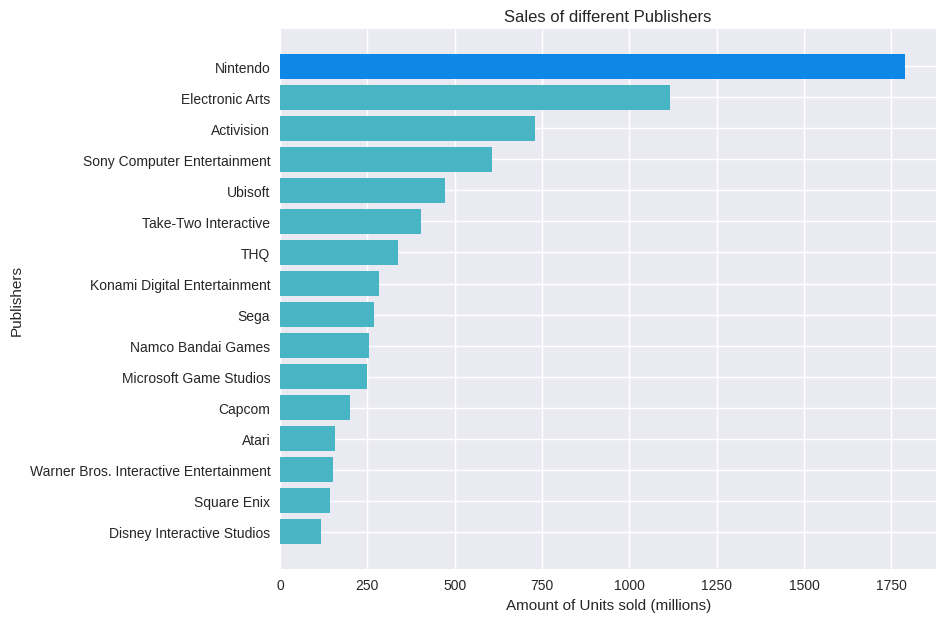

In [ ]:
#Sales Per Publisher
plt.style.use('seaborn-v0_8')

sales_trend = df.groupby(['Publisher']).sum(numeric_only=True).sort_values('Global_Sales', ascending=True)
nexgen  = sales_trend.loc[sales_trend['Global_Sales']>100]

x_axis =nexgen.index
n=len(x_axis)
r = np.arange(n)
width=0.25
fig3, ax1 = plt.subplots()
colors = ['#0d88e6']
for i in range(n-1):
  colors += ["#48b5c4"]
colors.reverse()

#Creating Barplots
bar1 = ax1.barh(r, nexgen['Global_Sales'],color=colors,label=x_axis)
ax1.set_yticks(ticks=r,labels=x_axis)
ax1.set(ylabel = ('Publishers') , xlabel= ("Amount of Units sold (millions)"), title=("Sales of different Publishers") )

#Formatting the plot

plt.tight_layout()
fig2 = plt.gcf()
fig2.set_size_inches(10.5, 6.5)
plt.show()




In thise code I grouped the dataset by publishers then filtered out the publishers to only show the ones with more than 100 million units sold I also sorted the result in descending order making it much easier to read. I then used horizontal bar graph method of mat plot lib to show all of the bars. I used
different color to emphasise the importance of the top competitor in the market.

---


**Area of Expertise**

This graph is very surprising as earlier we saw that the best selling Genres were Action, Shooter and sports. Nintendo, even though is the biggest publisher, rarely produces games from any of these genres. Nintendo's library consists of mainly platformer and RPGs.Nintendo has outperformed any publisher in the market by mostly developing all of the games themselves, hence creating a strong developer to publisher connection. This results in accurate knowledge of what needs to be produced and what is it that the market wants.Moreover, Nintendo is infamous among the community to be completely against Video-Game piracy and is actively legally involved in suing and banning companies as well as individuals for pirating or modifying their IPs(Intellectual Property). Although their methods bring some bad rep. Nintendo proves to be a prime example for our audience of a company that has managed to be "The biggest Player" in the gaming industry for 4 Decades.


---



# Conclusion
Overall, This anaylsis showed us great insights into the video game industry.However, presence of missing data in the initial dataset made analysis difficult and somewhat less reliable.Moreever, the dataset lacked any information about Mobile games which is bigger than all other major platforms combined.
As a Developer Producer, one can look at this analysis and figure out which market is best suitable for thei games or ideas. Does the game cater to the audience of that specific region? Is the game compatible with the platforms that are most famous in that region ? Such questions can be easily answered through these visualisations making it easier to make a more successful game.
As an Investor or business Analyst, one can gain important information about video game sales in different genres as well as different geolocations.These visualisations provides insights that can be used while deciding where to invest ones money as an investor in the Gaming Industry.